In [1]:
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
data_path = '../../input/Lago_Sintetico_Testes/'
geo_model = gp.create_model('SyntheitcBasinTeste5')

In [3]:
gp.init_data(geo_model,
             extent=[0, 2000, 0, 2000, 0, 2000],
             resolution=[50, 50, 50],
             path_i=data_path + "4_tres_pontos/surfaces_points.csv",
             path_o=data_path + "4_tres_pontos/orientations_points.csv")

Active grids: ['regular']


SyntheitcBasinTeste5  2023-03-10 14:34

In [4]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Formacao_1,Default series,1,#015482,1
1,Formacao_2,Default series,2,#9f0052,2
2,Formacao_3,Default series,3,#ffbe00,3
3,Formacao_4,Default series,4,#728f02,4
4,basement,Basement,1,#443988,5


In [5]:
gp.map_stack_to_surfaces(geo_model,
                         {"Strat_Series": ('Formacao_1', 'Formacao_2',
                                              'Formacao_3', 'Formacao_4')})

,surface,series,order_surfaces,color,id
0,Formacao_1,Strat_Series,1,#015482,1
1,Formacao_2,Strat_Series,2,#9f0052,2
2,Formacao_3,Strat_Series,3,#ffbe00,3
3,Formacao_4,Strat_Series,4,#728f02,4
4,basement,Basement,1,#443988,5


In [ ]:
geo_model.stack

In [ ]:
geo_model.set_is_fault(['Fault_Series'])

In [ ]:
geo_model.additional_data

In [6]:
geo_model.grid

Grid Object. Values: 
array([[  20.,   20.,   20.],
       [  20.,   20.,   60.],
       [  20.,   20.,  100.],
       ...,
       [1980., 1980., 1900.],
       [1980., 1980., 1940.],
       [1980., 1980., 1980.]])

C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


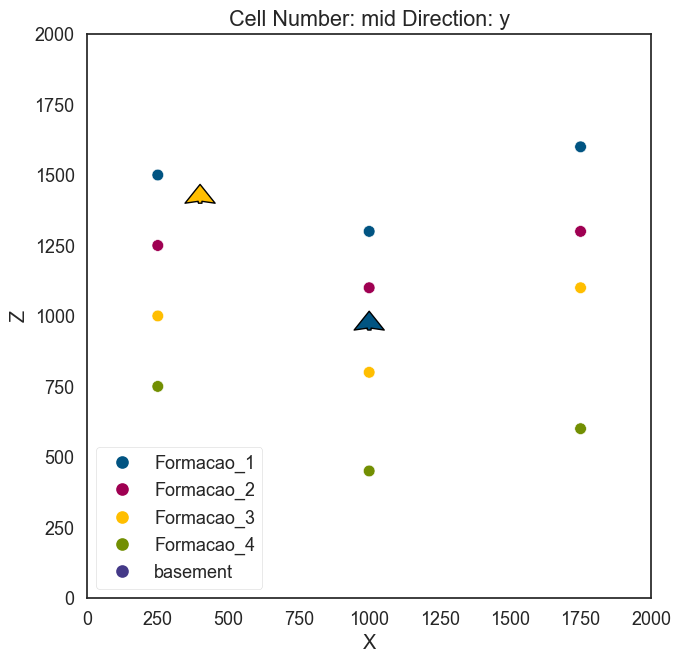

In [7]:
plot = gp.plot_2d(geo_model, show_lith=False, show_boundaries=False)
plt.show()

In [ ]:
gp.get_data(geo_model, 'orientations')

[1600. 2000.]
Active grids: ['regular' 'topography']


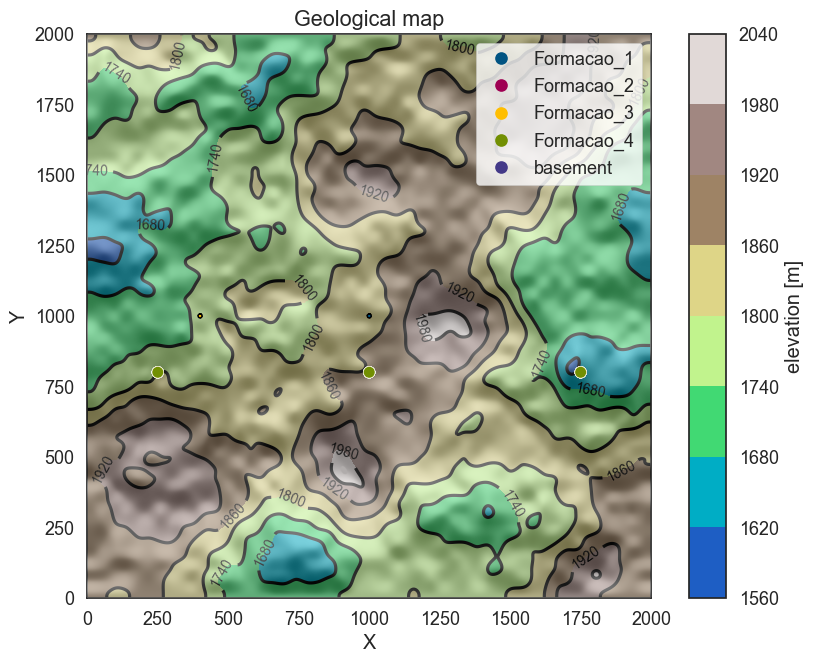

In [8]:
geo_model.set_topography(source='random')
gp.plot_2d(geo_model, show_topography=True, section_names=['topography'])
plt.show()

In [9]:
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic')

C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\pyvista\utilities\helpers.py:508: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  'Points is not a float type. This can cause issues when '


In [10]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                         values
range              3464.101615
$C_o$            285714.285714
drift equations         [3, 3]


In [11]:
sol = gp.compute_model(geo_model)

In [12]:
sol


Lithology ids 
  [5. 5. 5. ... 1. 1. 1.] 

C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


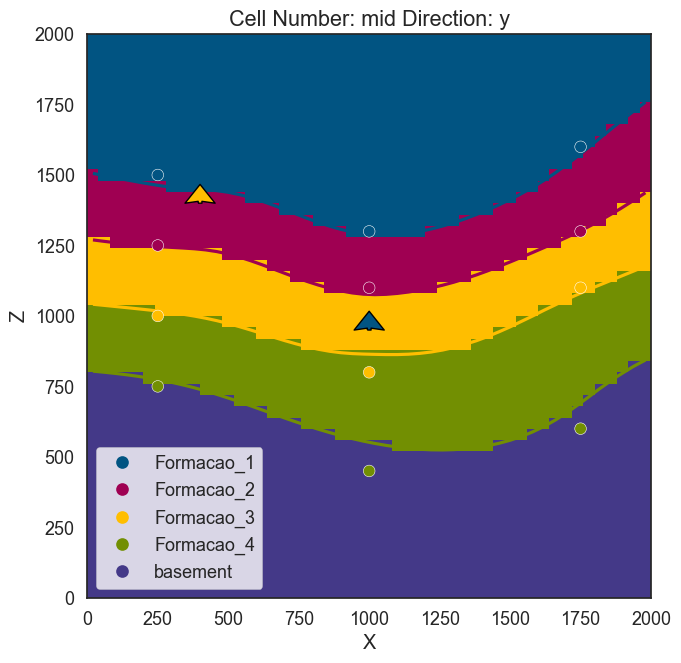

In [13]:
gp.plot_2d(geo_model, show_data=True)
plt.show()

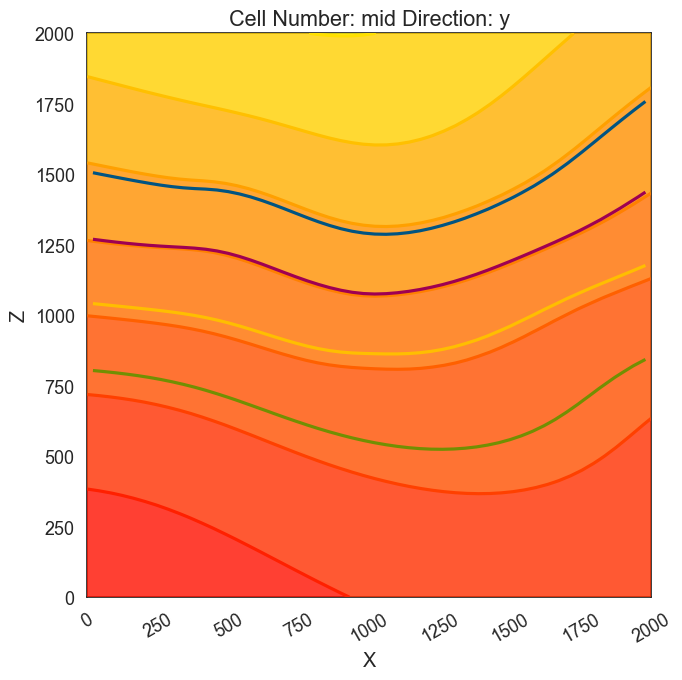

In [14]:
gp.plot_2d(geo_model, show_data=False, show_scalar=True, show_lith=False)
plt.show()

In [15]:
geo_model.solutions.scalar_field_at_surface_points

array([[0.73710587, 0.6055542 , 0.4746906 , 0.34186065]])

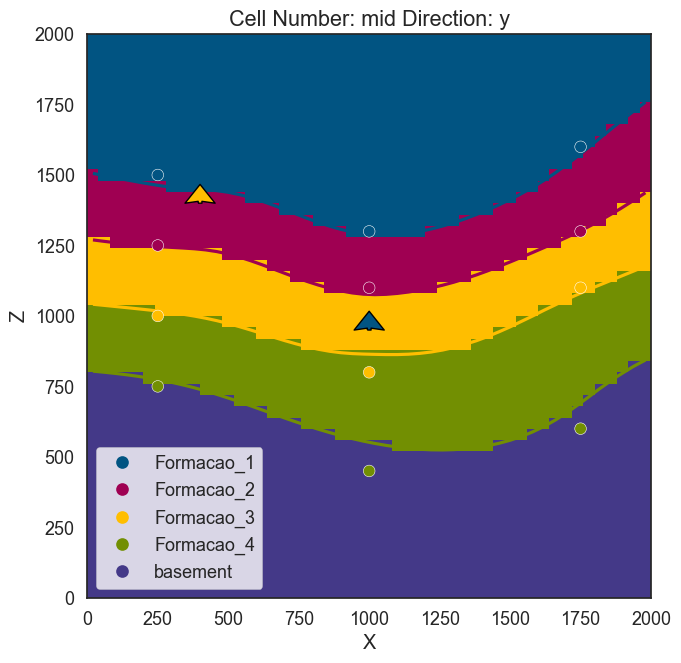

In [16]:
gp.plot_2d(geo_model, show_block=True, show_lith=False)
plt.show()

In [ ]:
gp.plot_2d(geo_model, series_n=1, show_block=True, show_lith=False)
plt.show()

In [17]:
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic')

C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\pyvista\plotting\tools.py:624: PyVistaDeprecationWarning: The usage of `parse_color` is deprecated in favor of the new `Color` class.
  PyVistaDeprecationWarning,
C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\pyvista\utilities\helpers.py:508: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  'Points is not a float type. This can cause issues when '


In [ ]:
gp.plot_2d(geo_model, show_topography=True, section_names=['topography'], show_boundaries=False, show_data=True)
plt.show()

In [ ]:
g3d = gp.plot_3d(geo_model,
                 show_topography=True,
                 show_lith=False,
                 show_surfaces=False,
                 show_results=False)

In [ ]:
gp.save_model(geo_model)